<a href="https://colab.research.google.com/github/Sachetti/LSTM-IEMA/blob/main/ProjetoIoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/My Drive/Mestrado/Dados_IEMA_2020_CSV2.csv', delimiter = ';')
#data = numpy.loadtxt('/content/drive/My Drive/my_directory/example.csv', delimiter = ';')



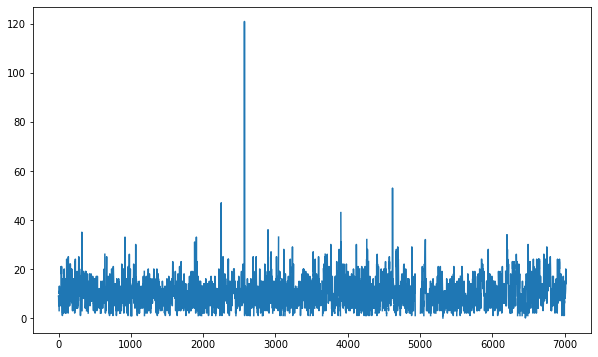

In [ ]:
data
dfPM  = data['PM25ES']
plt.figure(figsize=(10, 6))
plt.plot(dfPM) #zooming
plt.show()

In [ ]:
data

,Data,Time,EnxofreJC,PM10JC,EnxofreES,NitrogenioES,CarbonoES,OzonioES,PM10ES,PM25ES
0,01/01/20,00:30,"2,64",17.0,"0,55","7,28","167,39","46,36",16.0,9.0
1,01/01/20,01:30,"2,56",15.0,"0,44","8,7","211,87","42,59",10.0,9.0
2,01/01/20,02:30,"2,64",14.0,"0,45","4,81","186,55","44,58",10.0,6.0
3,01/01/20,03:30,"2,29",7.0,"0,44","9,43","205,94","42,59",10.0,5.0
4,01/01/20,04:30,"2,36",10.0,"0,39","4,41","181,29","36,85",9.0,6.0
...,...,...,...,...,...,...,...,...,...,...
7012,19/10/20,04:30,"1,6",NaN,"0,63","28,78","226,24","10,4",20.0,11.0
7013,19/10/20,05:30,"1,18",NaN,"0,8","27,72","305,75","11,89",22.0,12.0
7014,19/10/20,06:30,"2,04",NaN,"1,2","20,67","648,88","9,54",32.0,18.0
7015,19/10/20,07:30,"2,24",NaN,"0,97","17,59","598,25","22,2",30.0,20.0


In [ ]:
df = data[['Time','PM25ES']]
df

,Time,PM25ES
0,00:30,9.0
1,01:30,9.0
2,02:30,6.0
3,03:30,5.0
4,04:30,6.0
...,...,...
7012,04:30,11.0
7013,05:30,12.0
7014,06:30,18.0
7015,07:30,20.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


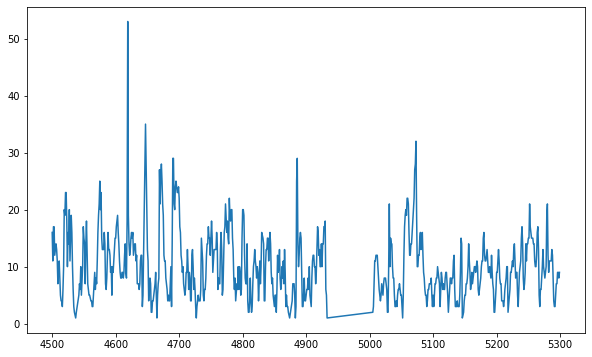

In [ ]:
df['PM25ES'] = df['PM25ES'].interpolate(method='values')
plt.figure(figsize=(10, 6))
plt.plot(df['PM25ES'][4500:5300]) #zooming
plt.show()


In [ ]:
df0 = []
df0 = df.loc[df['Time'] == '00:30']
df0

,Time,PM25ES
0,00:30,9.000000
24,00:30,5.000000
48,00:30,9.666667
72,00:30,9.000000
96,00:30,6.000000
...,...,...
6912,00:30,15.000000
6936,00:30,7.000000
6960,00:30,6.000000
6984,00:30,4.000000


In [ ]:
dfTotal = []
time_day = ['00:30', '01:30', '02:30', '03:30', '04:30', '05:30', '06:30', '07:30', 
        '08:30', '09:30', '10:30', '11:30', '12:30', '13:30', '14:30', '15:30',
        '16:30', '17:30', '18:30', '19:30', '20:30', '21:30', '22:30', '23:30']
for hour in time_day:
  d = []
  d = df.loc[df['Time'] == hour]
  d = d['PM25ES']
  dfTotal.append(d)

dfTotal
  

[0        9.000000
 24       5.000000
 48       9.666667
 72       9.000000
 96       6.000000
           ...    
 6912    15.000000
 6936     7.000000
 6960     6.000000
 6984     4.000000
 7008     9.000000
 Name: PM25ES, Length: 293, dtype: float64, 1        9.000000
 25       7.000000
 49       8.333333
 73      10.000000
 97       5.000000
           ...    
 6913    11.000000
 6937     8.000000
 6961     1.000000
 6985     1.000000
 7009    10.000000
 Name: PM25ES, Length: 293, dtype: float64, 2        6.0
 26       7.0
 50       7.0
 74       7.0
 98      12.0
         ... 
 6914    11.0
 6938     8.0
 6962     1.0
 6986     4.0
 7010    10.0
 Name: PM25ES, Length: 293, dtype: float64, 3        5.0
 27       7.0
 51       3.0
 75       7.0
 99      10.0
         ... 
 6915    14.0
 6939    12.0
 6963     3.0
 6987     8.0
 7011    11.0
 Name: PM25ES, Length: 293, dtype: float64, 4        6.0
 28       8.0
 52       1.0
 76       8.0
 100      9.0
         ... 
 6916    10.0
 694

In [ ]:
medias = []
for i in range(len(dfTotal)):
  medias.append(dfTotal[i].mean())

medias

[7.823407281001136,
 6.94891922639363,
 6.516695108077361,
 7.264789533560865,
 7.470221843003413,
 8.032423208191126,
 9.936433447098977,
 10.968430034129693,
 9.997582480091012,
 9.520319634703197,
 8.631535388127853,
 8.508162100456621,
 8.601969178082193,
 10.106164383561644,
 11.724286529680365,
 12.319577625570776,
 12.548715753424657,
 13.021004566210046,
 13.426512557077627,
 13.510102739726026,
 13.036615296803651,
 11.605936073059363,
 10.021147260273974,
 8.733162100456621]

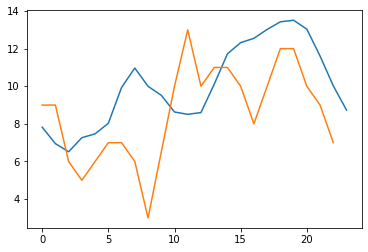

In [ ]:
plt.plot(medias)
plt.plot(df['PM25ES'][0:23])

plt.show()

In [ ]:
from numpy import array
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
dfTotal[0].values

array([ 9.        ,  5.        ,  9.66666667,  9.        ,  6.        ,
       14.        ,  7.        ,  9.        ,  7.        ,  6.        ,
        4.        ,  7.        , 17.        , 11.        , 11.        ,
        8.        ,  6.        ,  3.        ,  7.        ,  8.        ,
        6.        ,  3.        ,  5.        ,  6.        ,  6.        ,
        8.        , 11.        ,  2.        ,  8.        ,  6.        ,
        3.        ,  3.        ,  7.        ,  8.        ,  7.        ,
        5.        ,  6.        , 10.        , 16.        ,  9.        ,
        1.        , 12.        ,  5.        , 14.        ,  5.        ,
       11.        ,  5.        ,  5.        ,  6.        ,  8.        ,
       10.        ,  5.        ,  9.        ,  4.        ,  6.        ,
       19.        ,  5.        ,  7.        ,  6.        ,  6.        ,
       11.        ,  2.        ,  6.        ,  6.        ,  4.        ,
        7.        , 13.        ,  9.        , 12.        ,  7.  

In [ ]:
# X = data.drop(columns=['PM25ES'])
# dt = data['PM25ES'].values
# dt

X_days = []
y_days = []

for i in range(len(dfTotal)):
  X_r, y_r = split_sequence(dfTotal[i].values, 9)
  X_days.append(X_r)
  y_days.append(y_r)


# X, y = split_sequence(dfTotal, 9)

for i in range(len(X_days)):
  for j in range(len(X_days[i])):
    print(X_days[i][j], y_days[i][j])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

A saída de streaming foi truncada nas últimas 5000 linhas.
[16.  8.  8.  7.  3.  6.  9. 12. 10.] 7.0
[ 8.  8.  7.  3.  6.  9. 12. 10.  7.] 5.0
[ 8.  7.  3.  6.  9. 12. 10.  7.  5.] 4.0
[ 7.  3.  6.  9. 12. 10.  7.  5.  4.] 17.0
[ 3.  6.  9. 12. 10.  7.  5.  4. 17.] 11.0
[ 6.  9. 12. 10.  7.  5.  4. 17. 11.] 5.0
[ 9. 12. 10.  7.  5.  4. 17. 11.  5.] 18.0
[12. 10.  7.  5.  4. 17. 11.  5. 18.] 21.0
[10.  7.  5.  4. 17. 11.  5. 18. 21.] 19.0
[ 7.  5.  4. 17. 11.  5. 18. 21. 19.] 17.0
[ 5.  4. 17. 11.  5. 18. 21. 19. 17.] 7.0
[ 4. 17. 11.  5. 18. 21. 19. 17.  7.] 12.0
[17. 11.  5. 18. 21. 19. 17.  7. 12.] 11.0
[11.  5. 18. 21. 19. 17.  7. 12. 11.] 13.0
[ 5. 18. 21. 19. 17.  7. 12. 11. 13.] 15.0
[18. 21. 19. 17.  7. 12. 11. 13. 15.] 13.0
[21. 19. 17.  7. 12. 11. 13. 15. 13.] 12.0
[19. 17.  7. 12. 11. 13. 15. 13. 12.] 9.0
[17.  7. 12. 11. 13. 15. 13. 12.  9.] 20.0
[ 3.  7.  8. 16.  5. 14. 13.  8.  5.] 3.0
[ 7.  8. 16.  5. 14. 13.  8.  5.  3.] 4.0
[ 8. 16.  5. 14. 13.  8.  5.  3.  4.] 8.0
[16.

In [ ]:
for i in range(len(X_days)):
  print(len(X_days[i]))

284
284
284
284
284
284
284
284
284
283
283
283
283
283
283
283
283
283
283
283
283
283
283
283


In [ ]:
print(X_days[0], y_days[0])

[[ 9.          5.          9.66666667 ...  7.          9.
   7.        ]
 [ 5.          9.66666667  9.         ...  9.          7.
   6.        ]
 [ 9.66666667  9.          6.         ...  7.          6.
   4.        ]
 ...
 [11.         14.         20.         ...  7.         15.
   7.        ]
 [14.         20.          7.         ... 15.          7.
   6.        ]
 [20.          7.          5.         ...  7.          6.
   4.        ]] [ 6.          4.          7.         17.         11.         11.
  8.          6.          3.          7.          8.          6.
  3.          5.          6.          6.          8.         11.
  2.          8.          6.          3.          3.          7.
  8.          7.          5.          6.         10.         16.
  9.          1.         12.          5.         14.          5.
 11.          5.          5.          6.          8.         10.
  5.          9.          4.          6.         19.          5.
  7.          6.          6.        

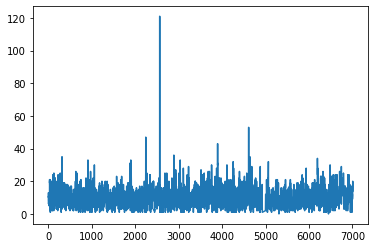

In [ ]:
plt.plot(y)
plt.show()

In [ ]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(9, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
for i in range(len(X_days)):
  X_days[i] = X_days[i].reshape((X_days[i].shape[0], X_days[i].shape[1], 1))

# X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_days[0], y_days[0], test_size=0.3, random_state=1)

In [ ]:
# fit model
model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted


array([[ 9.303533 ],
       [16.309696 ],
       [11.056896 ],
       [ 8.576377 ],
       [10.285324 ],
       [12.579385 ],
       [17.953568 ],
       [26.274612 ],
       [ 6.3965125],
       [18.403048 ],
       [ 9.711249 ],
       [ 8.959395 ],
       [12.696299 ],
       [ 7.202424 ],
       [10.951029 ],
       [12.221037 ],
       [ 3.1984935],
       [ 6.1999063],
       [ 2.8258696],
       [10.103797 ],
       [ 8.014149 ],
       [ 6.4138656],
       [ 8.8553095],
       [12.133774 ],
       [ 5.135972 ],
       [ 9.179826 ],
       [ 7.8930883],
       [ 5.979708 ],
       [ 5.58912  ],
       [12.990618 ],
       [ 6.4766264],
       [ 8.0022545],
       [ 6.2126694],
       [ 7.792523 ],
       [13.62056  ],
       [10.094004 ],
       [ 8.205606 ],
       [ 6.9222383],
       [ 5.4982004],
       [12.350422 ],
       [ 8.856607 ],
       [ 9.81221  ],
       [ 7.332454 ],
       [ 7.8532643],
       [ 1.8847038],
       [17.123693 ],
       [ 8.967373 ],
       [15.77

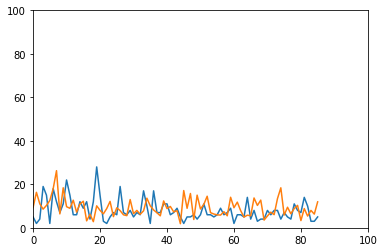

In [ ]:
plt.plot(y_test)
plt.plot(predicted)
plt.axis([0, 100, 0, 100])
plt.show()

In [ ]:
print(keras.metrics.mean_squared_error(y_test, predicted).numpy())
print(keras.metrics.mean_absolute_error(y_test, predicted).numpy())

[ 25.52727   93.20499   33.254234  24.12646   29.096441  44.9512
 123.3039   358.5789    26.264032 132.4747    26.77541   24.732504
  46.041096  24.366472  32.613274  41.780922  46.598576  26.924053
  50.29841   28.291254  23.768301  26.20949   24.538778  41.047794
  31.836891  25.214308  23.773897  27.755053  29.467653  48.90583
  26.017254  23.767551  26.87886   23.80084   55.619556  28.249691
  23.819279  24.878887  29.910082  42.895958  24.541061  27.13584
  24.182009  23.78215   60.87986  107.433586  24.748245  84.542564
  41.061924  73.30272   24.227358  31.60659   66.55823   24.779072
  26.482714  27.833311  28.30207   24.09365   29.789942  60.60045
  25.345964  38.37447   23.774433  33.073986  28.510569  29.758852
  56.734715  29.097383  46.445694  43.436256  30.20826   24.38522
  27.500216  53.532413 132.29639   28.230143  25.948946  26.115625
  24.551147  29.289988  45.484722  24.504375  30.36931   23.767334
  26.603184  39.379623]
[ 4.1644335  8.933699   5.0357256  3.865629 

In [ ]:
naive_forecast = y_test.copy()
naive_forecast[0] = y_test[-1]
naive_forecast[1:-1] = y_test[0:-2]

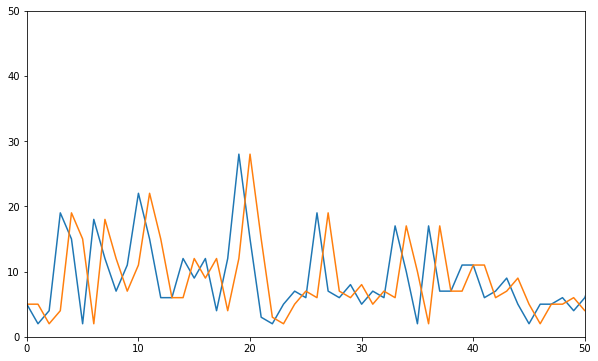

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test)
plt.plot(naive_forecast)
plt.axis([0, 50, 0, 50])
plt.show()

In [ ]:
print(keras.metrics.mean_squared_error(y_test, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(y_test, naive_forecast).numpy())

38.883720930232556
4.558139534883721


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from google.colab import files
src = list(files.upload().values())[0]
open('time_series_functions.py','wb').write(src)


Saving time_series_functions.py to time_series_functions.py


4903

In [ ]:
import time_series_functions as tsf
tsf.gerenerate_metric_results(y_test, predicted)

{'ARV': 2.185917240602052,
 'IA': 0.37046258591634695,
 'MAE': 4.844554824884548,
 'MAPE': 94.42622927606436,
 'MSE': 40.317692629571894,
 'POCID': 45.348837209302324,
 'RMSE': 6.3496214556122865,
 'SMAPE': 0.5481428221314395,
 'theil': 1.232188601040962}

In [ ]:
tsf.gerenerate_metric_results(y_test, naive_forecast)

{'ARV': 1.6488773708231086,
 'IA': 0.5003549120736045,
 'MAE': 4.558139534883721,
 'MAPE': 72.7282299923419,
 'MSE': 38.883720930232556,
 'POCID': 23.25581395348837,
 'RMSE': 6.235681272341664,
 'SMAPE': 0.5354172393938906,
 'theil': 0.998805256869773}

In [ ]:
# define model
model2 = Sequential()
model2.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(9, 1)))
model2.add(LSTM(100, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

In [ ]:
model2.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
predicted2 = model2.predict(X_test)

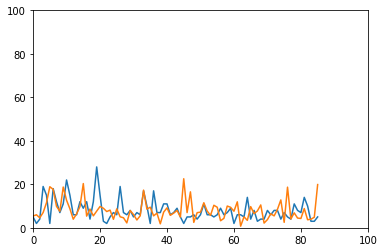

In [ ]:
plt.plot(y_test)
plt.plot(predicted2)
plt.axis([0, 100, 0, 100])
plt.show()

In [ ]:
print(keras.metrics.mean_squared_error(y_test, predicted2).numpy())
print(keras.metrics.mean_absolute_error(y_test, predicted2).numpy())

[ 30.35315   27.685616  35.19602   24.720446  36.034996 142.94093
 117.96761   27.332706  23.904007 139.77989   45.77344   24.362036
  39.96682   26.237015  26.92512  176.64737   30.526426  24.181177
  29.915888  23.858904  27.098307  24.79491   24.01413   23.78963
  40.258327  24.283314  32.25734   35.088154  56.53284   23.767887
  27.268282  42.91823   29.796955 111.113625  24.143398  26.019653
  29.927212  25.321823  61.549698  24.365845  25.183714  28.721716
  25.255224  23.766941  32.885624 236.50327   24.750338  96.99595
  53.838577  24.816387  24.355639  36.352543  23.833965  28.762922
  29.467304  25.953333  46.130924  37.000896  27.875994  25.862804
  23.903664  39.503365  76.01448   32.284683  44.595028  26.862251
  25.793114  23.820906  30.194975  57.40497   41.466293  26.10841
  29.97759   24.042103  47.20304   53.63013  138.47664   39.319252
  24.952272  36.01628   37.33441   24.523811  42.055298  39.930492
  33.531742 165.35281 ]
[ 3.6242874  3.419592   4.002299   3.41866

In [ ]:
tsf.gerenerate_metric_results(y_test, predicted2)

{'ARV': 1.9640062648964962,
 'IA': 0.4136157049484661,
 'MAE': 4.508909228929253,
 'MAPE': 86.83842714773282,
 'MSE': 40.81657091821931,
 'POCID': 43.02325581395349,
 'RMSE': 6.388784776326348,
 'SMAPE': 0.5538370800235236,
 'theil': 1.0466145479719446}

In [ ]:
# define model
model3 = Sequential()
model3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(9, 1)))
model3.add(LSTM(50, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

In [ ]:
model3.fit(X_train, y_train, epochs=200, verbose=0)

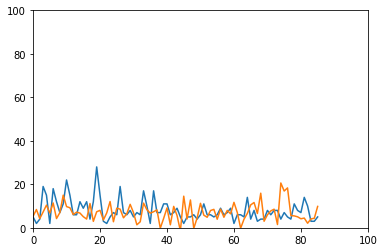

In [ ]:
predicted3 = model3.predict(X_test)
plt.plot(y_test)
plt.plot(predicted3)
plt.axis([0, 100, 0, 100])
plt.show()

In [ ]:
tsf.gerenerate_metric_results(y_test, predicted3)

{'ARV': 2.277783518922099,
 'IA': 0.3551328170008963,
 'MAE': 4.9046168488472,
 'MAPE': 83.21552891350883,
 'MSE': 39.7475926954088,
 'POCID': 45.348837209302324,
 'RMSE': 6.304569191896366,
 'SMAPE': 0.6624336717478215,
 'theil': 1.174548933150506}

In [ ]:
# define model
model4 = Sequential()
model4.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(9, 1)))
model4.add(LSTM(25, activation='relu'))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse')

In [ ]:
model4.fit(X_train, y_train, epochs=200, verbose=0)

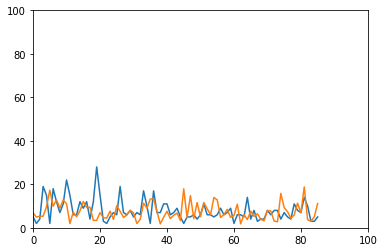

In [ ]:
predicted4 = model4.predict(X_test)
plt.plot(y_test)
plt.plot(predicted4)
plt.axis([0, 100, 0, 100])
plt.show()

In [ ]:
tsf.gerenerate_metric_results(y_test, predicted4)

{'ARV': 2.49620724644217,
 'IA': 0.41526489179242687,
 'MAE': 4.341637585052224,
 'MAPE': 76.59603351805282,
 'MSE': 37.60679970342645,
 'POCID': 41.86046511627907,
 'RMSE': 6.132438316316476,
 'SMAPE': 0.536885605997906,
 'theil': 1.3004097529331557}

In [ ]:
import time
from time import perf_counter

In [ ]:
# define model
model5 = Sequential()
model5.add(LSTM(25, activation='relu', input_shape=(9, 1)))
model5.add(Dense(1))
model5.compile(optimizer='adam', loss='mse')

In [ ]:
start = time.perf_counter()
model5.fit(X_train, y_train, epochs=200, verbose=0)
end = time.perf_counter()
tempo = end - start
tempo

6.886772270000165

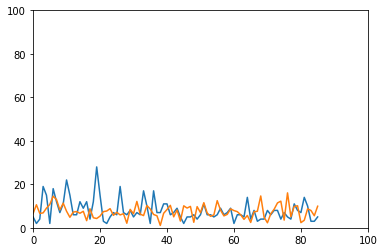

In [ ]:
predicted5 = model5.predict(X_test)
plt.plot(y_test)
plt.plot(predicted5)
plt.axis([0, 100, 0, 100])
plt.show()

In [ ]:
tsf.gerenerate_metric_results(y_test, predicted5)

{'ARV': 3.9088933202846645,
 'IA': 0.29426626655223875,
 'MAE': 4.277840592140375,
 'MAPE': 74.322887423635,
 'MSE': 35.62499419741664,
 'POCID': 41.86046511627907,
 'RMSE': 5.968667707069698,
 'SMAPE': 0.5503742192587768,
 'theil': 2.0579756846620505}

In [ ]:
# define model
model6 = Sequential()
model6.add(LSTM(13, activation='relu', input_shape=(9, 1)))
model6.add(Dense(1))
model6.compile(optimizer='adam', loss='mse')

In [ ]:
start = time.perf_counter()
model6.fit(X_train, y_train, epochs=200, verbose=0)
end = time.perf_counter()
tempo = end - start
tempo

6.294415790999665

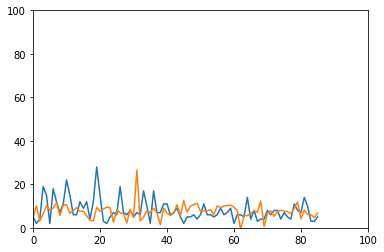

In [ ]:
predicted6 = model6.predict(X_test)
plt.plot(y_test)
plt.plot(predicted6)
plt.axis([0, 100, 0, 100])
plt.show()

In [ ]:
tsf.gerenerate_metric_results(y_test, predicted6)

{'ARV': 2.932201646784211,
 'IA': 0.34184257630857673,
 'MAE': 4.172178102787151,
 'MAPE': 72.54193998795805,
 'MSE': 32.53355706942847,
 'POCID': 53.48837209302325,
 'RMSE': 5.703819515853255,
 'SMAPE': 0.5382085833682474,
 'theil': 1.3149189583914258}

In [ ]:
# define model
model7 = Sequential()
model7.add(LSTM(7, activation='relu', input_shape=(9, 1)))
model7.add(Dense(1))
model7.compile(optimizer='adam', loss='mse')

In [ ]:
start = time.perf_counter()
model7.fit(X_train, y_train, epochs=200, verbose=0)
end = time.perf_counter()
tempo = end - start
tempo

6.023103623999759

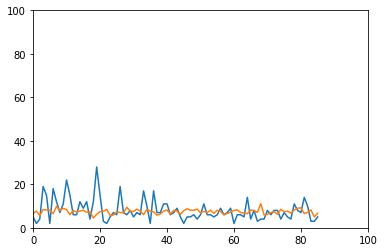

In [ ]:
predicted7 = model7.predict(X_test)
plt.plot(y_test)
plt.plot(predicted7)
plt.axis([0, 100, 0, 100])
plt.show()

In [ ]:
tsf.gerenerate_metric_results(y_test, predicted7)

{'ARV': 17.705603169710997,
 'IA': 0.18937681826258146,
 'MAE': 3.6260380356810815,
 'MAPE': 60.1380016890823,
 'MSE': 26.25685858809641,
 'POCID': 41.86046511627907,
 'RMSE': 5.124144668927333,
 'SMAPE': 0.4500186172402508,
 'theil': 10.927879570380185}